## Comparison between Kmeans and DBScan

### Dependency setting and data preparation

In [143]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [144]:
ls data/output-extracts/bordeaux-metropole

bordeaux-metropole-chgset-kmeans.h5  bordeaux-metropole-enriched-elements.csv
bordeaux-metropole-chgset-md.csv     bordeaux-metropole-fulltag-analysis.csv
bordeaux-metropole-chgset-pca.h5     bordeaux-metropole-tag-genome.csv
bordeaux-metropole-chronology.csv    bordeaux-metropole-user-kmeans.h5
bordeaux-metropole-elements.csv      bordeaux-metropole-user-md.csv
bordeaux-metropole-elem-md.csv       bordeaux-metropole-user-pca.h5


We work with the result of the PCA process applied to users, on the *Bordeaux-metropole* data.

In [145]:
user_md = pd.read_csv('data/output-extracts/bordeaux-metropole/bordeaux-metropole-user-md.csv', index_col=0)
user_pcavar = pd.read_hdf('data/output-extracts/bordeaux-metropole/bordeaux-metropole-user-pca.h5', '/features')
user_pcaind = pd.read_hdf('data/output-extracts/bordeaux-metropole/bordeaux-metropole-user-pca.h5', '/individuals')

In [146]:
user_md.iloc[:,:18].describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2073.0,1.217628e+06,1.374800e+06,165.0,135299.0,571804.000000,2.031678e+06,5.331702e+06
activity_d,2073.0,2.588472e+02,5.691057e+02,0.0,0.0,0.022917,1.579803e+02,3.305051e+03
n_chgset_c0,2073.0,1.649686e+01,1.451568e+02,1.0,1.0,2.000000,6.000000e+00,4.422000e+03
n_chgset_c1,2073.0,2.990835e-02,5.227201e-01,0.0,0.0,0.000000,0.000000e+00,1.700000e+01
n_chgset_c2,2073.0,4.823927e-03,9.308049e-02,0.0,0.0,0.000000,0.000000e+00,3.000000e+00
n_chgset_c3,2073.0,2.894356e-03,5.373427e-02,0.0,0.0,0.000000,0.000000e+00,1.000000e+00
t10_between_chgsets_h,2073.0,6.956450e+01,4.150392e+02,0.0,0.0,0.009639,1.677778e-01,6.925147e+03
t90_between_chgsets_h,2073.0,1.917917e+03,5.393725e+03,0.0,0.0,0.192917,6.800743e+02,6.232632e+04
d10_chgset_m,2073.0,1.000496e+00,1.053824e+01,0.0,0.0,0.000000,3.333333e-03,4.265667e+02
d90_chgset_m,2073.0,4.600759e+00,2.064647e+01,0.0,0.0,0.011667,3.300000e-01,4.265667e+02


In [147]:
user_md.iloc[:,18:].describe().T

,count,mean,std,min,25%,50%,75%,max
n_node_modif_crmod,2073.0,0.082401,0.194565,0.0,0.0,0.0,0.039301,1.000000
n_node_modif_crdel,2073.0,0.065898,0.187912,0.0,0.0,0.0,0.005000,1.000000
n_node_modif_imputd,2073.0,0.106534,0.241485,0.0,0.0,0.0,0.060071,1.000000
n_node_modif_impmod,2073.0,0.098585,0.234031,0.0,0.0,0.0,0.030303,1.000000
n_node_modif_impdel,2073.0,0.022708,0.096401,0.0,0.0,0.0,0.000000,1.000000
n_node_modif_delutd,2073.0,0.060320,0.179484,0.0,0.0,0.0,0.000000,1.000000
n_node_modif_delrebirth,2073.0,0.001369,0.026287,0.0,0.0,0.0,0.000000,0.730000
n_node_modif_cor,2073.0,0.235369,0.356199,0.0,0.0,0.0,0.417377,1.000000
n_node_modif_autocor,2073.0,0.036566,0.110939,0.0,0.0,0.0,0.000000,0.877335
n_way_modif,2073.0,302.196334,3607.030306,0.0,0.0,1.0,7.000000,96935.000000


***!!!!!!!!!!!! Disclaimer !!!!!!!!!!!!*** 

The quantity-related features are now expressed as percentages (features with name as **'n_[elem]_modif_foo'**) of number of modifications (features named as **'n_[elem]_modif'**). The feature names do not have been modified yet.

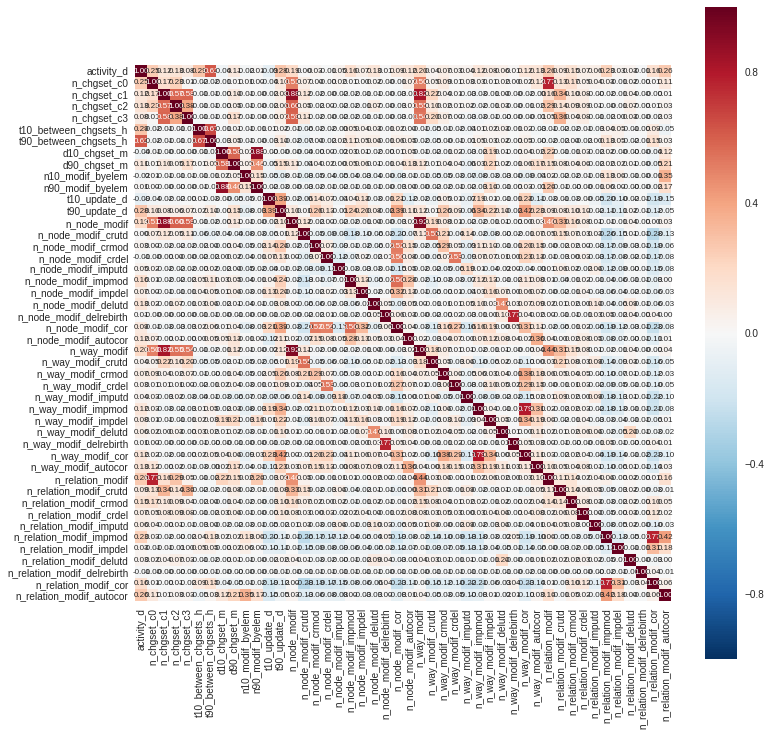

In [170]:
f, ax = plt.subplots(figsize=(12,12))
# Draw the heatmap using seaborn
sns.heatmap(user_md.iloc[:,3:].astype(float).corr(), vmax=1, 
            square=True, annot=True, annot_kws={'size':8}, fmt='.2f')

In [148]:
user_pcaind.shape

(2073, 3)

In [149]:
user_pcaind.quantile(q=np.linspace(0,1,11))

,PC1,PC2,PC3
0.0,-3.109809,-9.804578,-46.748116
0.1,-3.096312,-0.608428,-0.247220
0.2,-3.095462,-0.607090,-0.237287
0.3,-3.094100,-0.605470,-0.236454
0.4,-3.090474,-0.599424,-0.235693
0.5,-3.085053,-0.596069,-0.230123
0.6,-3.070498,-0.558750,-0.226756
0.7,-3.042203,-0.380815,-0.216843
0.8,-2.971857,-0.300504,-0.196860
0.9,-2.667271,0.314086,-0.121597


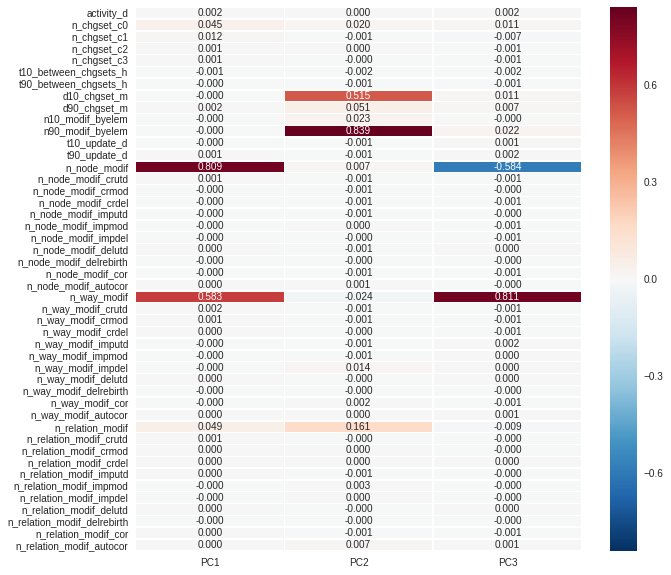

In [152]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(user_pcavar, annot=True, fmt='.3f', linewidths=0.5, ax=ax)

Three features have been identified during the PCA process. The first ones is linked with the number of contributions, it is particularly influenced by the number of node and way modifications.

Then the second component is mainly impacted by the number of modifications by single elements and by the change set duration, i.e. this component will be high for users that take long times to work on their change sets, and that tend to modify a large amount of times the same elements.

The third component is focused on the same features than the first one, however it highlights users who contributes on ways *without* contributing on nodes.

### KMeans

The KMeans algorithm needs to define a number of cluster. We can evaluate it with a simple elbow method.

In [153]:
scores = []
for i in range(1, 10 + 1):           
    model = KMeans(n_clusters=i, n_init=100, max_iter=1000)
    model.fit(user_pcaind.values)
    scores.append(model.inertia_)
scores

[3404195.7584267906,
 1163224.8999353508,
 414094.35016787861,
 283158.59824225149,
 193281.06219440521,
 110425.04134490552,
 63329.782725606652,
 42117.557898949657,
 32350.010583980231,
 26531.832508152154]

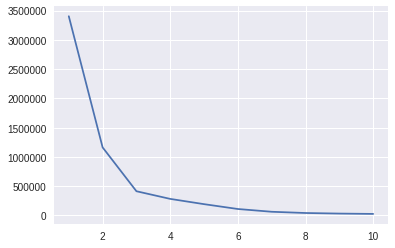

In [154]:
plt.plot(range(1,10+1),scores)

Three clusters ?

In [156]:
model = KMeans(n_clusters=3, n_init=100, max_iter=1000)
kmeans_res = model.fit_predict(user_pcaind.values)
pd.Series(kmeans_res).value_counts()

0    2060
2      11
1       2
dtype: int64

The repartition of individuals is clearly unbalanced. We have around 99.5% of individuals into the first cluster, around 0.5% of individuals into the second cluster, and only two individuals into the third cluster.

In [209]:
user_group = user_pcaind.copy()

In [210]:
user_group['kmeans_group'] = kmeans_res
user_group.groupby('kmeans_group')['PC1','PC2','PC3'].mean()

,PC1,PC2,PC3
kmeans_group,,,
0,-2.461500,-0.000942,-0.126496
1,1035.400289,0.075698,-45.435985
2,272.717162,0.162558,31.950405


These clusters can be interpreted as follows:
- The first cluster (C0) groups the major part of OSM contributors: those who propose just a few modifications (merely nodes), who open short change sets and who do not modify the same elements again and again.
- The second cluster (C1) identifies two outliers, who have intensively contributed to OSM nodes (very large PC1, large negative PC3).
- The third cluster (C2) gives a picture of 'expert' OSM users: they contributes intensively to the API (large PC1), they tends to contributes more on complexe structures (large PC3), and spend more times to contributes, in longer change set (PC2). The larger PC2 value indicates larger amount of auto-modifications (multiple contributions on same elements): it could be the sign of an automated contribution process.

In [178]:
c0_index = user_groups.query('kmeans_group==0').sample(10).index
user_md.query('uid in @c0_index')[['uid', 'd10_chgset_m', 'n90_modif_byelem', 'n_node_modif', 'n_way_modif']]

,uid,d10_chgset_m,n90_modif_byelem,n_node_modif,n_way_modif
197,26599,0.000000,1.0,17.0,7.0
579,442210,0.081667,1.0,3.0,2.0
620,87658,0.000000,1.0,0.0,0.0
625,390669,0.033333,1.0,0.0,2.0
865,673715,0.200000,35.4,0.0,0.0
1197,565580,0.000000,1.0,0.0,0.0
1316,1193827,0.000000,1.0,1.0,0.0
1347,1037486,0.033333,1.0,14.0,10.0
1361,2195153,0.000000,1.0,0.0,2.0
1448,2672464,0.000000,1.0,2.0,1.0


In [180]:
c1_index = user_groups.query('kmeans_group==1').index
user_md.query('uid in @c1_index')[['uid', 'd10_chgset_m', 'n90_modif_byelem', 'n_node_modif', 'n_way_modif']]

,uid,d10_chgset_m,n90_modif_byelem,n_node_modif,n_way_modif
55,53048,0.0,1.0,448662.0,77395.0
671,219843,0.0,1.0,547169.0,96935.0


In [179]:
c2_index = user_groups.query('kmeans_group==2').sample(10).index
user_md.query('uid in @c2_index')[['uid', 'd10_chgset_m', 'n90_modif_byelem', 'n_node_modif', 'n_way_modif']]

,uid,d10_chgset_m,n90_modif_byelem,n_node_modif,n_way_modif
22,25762,0.000000,2.0,143399.0,23280.0
114,37548,0.000000,1.0,105812.0,20392.0
301,201149,0.450000,1.0,0.0,59199.0
374,302591,0.000000,2.0,108801.0,32743.0
425,354363,0.000000,1.0,109690.0,19001.0
637,152665,0.000000,1.0,107951.0,21817.0
724,260584,0.046667,2.0,243493.0,42803.0
889,886721,0.033333,1.0,91410.0,15424.0
970,706229,0.135000,1.0,113277.0,21709.0
1005,1398891,4.966667,1.0,82893.0,16154.0


**Conclusion:**
- most users spend a short time to work on their change sets, they begin new change sets quickly after finishing their previous one (or they contributes in one-shot change sets as well) and they propose just a few modifications (cluster 0);
- there is an original user that spend a lot of time in his change sets (maximum, by definition: 24 hours), begin new change sets after quite a long idle time and contributes intensively to OSM (cluster 1);
- some users might be called 'experts', in the sense that they propose a lot of contributions on elements, and close their change sets very fastly. It looks like they use dedicated editing tools to make their contributions more professional. Surprinsingly, their change sets are very sparse in time.

**Limitations:**
- The variable that are highlighted are not necessarily those which best describe what is an OSM contributor. Some feature engineering is still needed.
- We would like to avoid the creation of clusters with only a few individuals. Unlike the previous limitation, we can act on this issue by using another algorithm: DBScan. This will allow us to set a kind of lower bound in the number of individuals in each group.

### DBScan

Two seminal parameters must be set in DBScan algorithm: `min_samples`, the minimal number of neighboring individuals to consider an individuals as a core point; and `eps`, the distance that defines what is a neighbor.

***Disclaimer:*** `min_samples` is not the lower bound of cluster size. It represents a limit to define an individuals as important, in terms of density (are there enough neighboring points to consider the individuals as a core point ?) The larger the parameter will be, the smaller will be the chance for any point to become a core point.

In [309]:
model = DBSCAN(min_samples=5, eps=1)
dbs_res = model.fit_predict(user_pcaind.values)
pd.Series(dbs_res).value_counts()

 0    1985
-1      75
 1       8
 2       5
dtype: int64

In [310]:
user_groups = user_group.copy()
user_groups['dbs_group'] = dbs_res
user_groups.groupby('dbs_group')['PC1','PC2','PC3'].mean()

,PC1,PC2,PC3
dbs_group,,,
-1,79.223281,6.451963,5.509393
0,-2.973738,-0.309415,-0.208185
1,-3.006261,8.825408,-0.008673
2,-2.965093,11.937805,0.022241


In this case, we have four groups, and three of them have centroids close to the origin of the 3D-space. Actually, the '-1' group is related to outliers, wherever they can be. We notice that they design (on average!) users that contributes a lot, with a specific attention to ways. They propose multi-contribution as well, however it is also the case of some clustered individuals (groups 1 and 2).

Groups 1 and 2 tend to contribute roughly on the same manner than group 0 ('normal' users), multi-contributions and change set duration excepted. Group 2 contributes slightly more on ways than other clustered individuals.

**Plot:**

By using the *sklearn website*, we attempt to plot our data set (after PCA processing):

http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

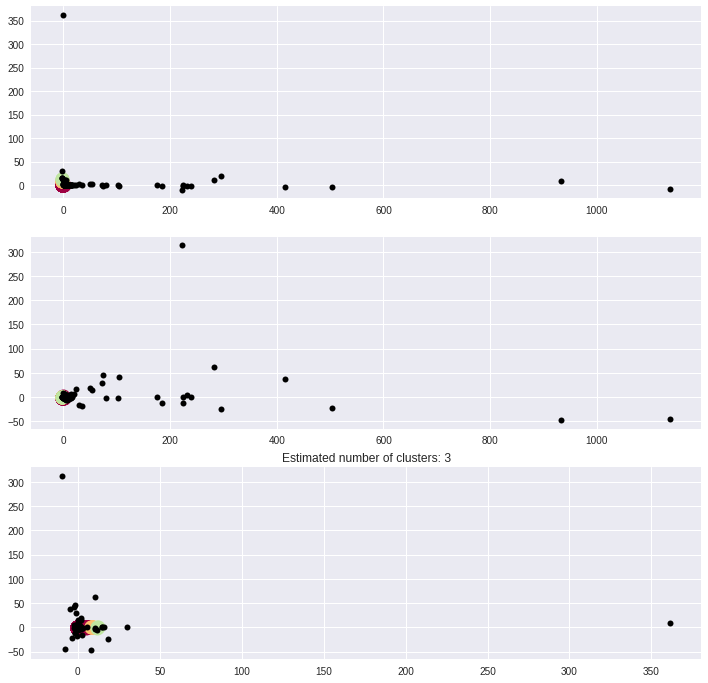

In [311]:
X = user_pcaind.values
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
f, ax = plt.subplots(3,1, figsize=(12,12))
plt.title('Estimated number of clusters: %d' % n_clusters_)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax[0].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    ax[0].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax[1].plot(xy[:, 0], xy[:, 2], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    ax[1].plot(xy[:, 0], xy[:, 2], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax[2].plot(xy[:, 1], xy[:, 2], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    ax[2].plot(xy[:, 1], xy[:, 2], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.show()

These results must be interpret as the DBScan incapacity to properly classify users according to their contributions. The high number of outliers as well as their sparsity relatively to the great concentration of point at the 3D-space origin make the algorithm unable to distinguish several class of users.

***What happens exactly?*** In each parametrization, the algorithm recognizes the cluster of 'normal' users, at the diagram origin. However we are only able to identify alternative clusters if we consider very specific parameters (tiny `eps`, to break the major cluster into several groups, or small `min_samples`, to stimulate the creation of one or more little "expert" group, where the density of points is smaller). In each case, the algorithm marks isolated points as outliers, and do not even consider them further into the analysis (in OSM data case, we have plenty of them...)

## Perspectives

DBScan does not allow easier conclusions than KMeans. The key of the interpretation is still unsolved here: it is just like if we miss a crucial point, regarding our features...